<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/FFT_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install openai -q
!pip install scipy -q
!pip install colab-env -q
import colab_env
import os

Mounted at /content/gdrive


FFT Findings: {'dominant_frequencies': [np.float64(20.0), np.float64(5.0), np.float64(12.0)], 'dominant_amplitudes': [np.float64(250.0), np.float64(250.0), np.float64(250.0)]}

LLM Interpretation: This frequency analysis shows a signal with dominant frequencies at 5 Hz, 12 Hz, and 20 Hz, all with equal amplitudes of 250. These frequencies may indicate a repetitive pattern or harmonic relationship, potentially representing a periodic motion or oscillation in the signal.



FFT Findings: {'dominant_frequencies': [np.float64(20.0), np.float64(5.0), np.float64(12.0)], 'dominant_amplitudes': [np.float64(250.0), np.float64(250.0), np.float64(250.0)]}
Dominant Frequencies (Hz): [20.  5. 12.]




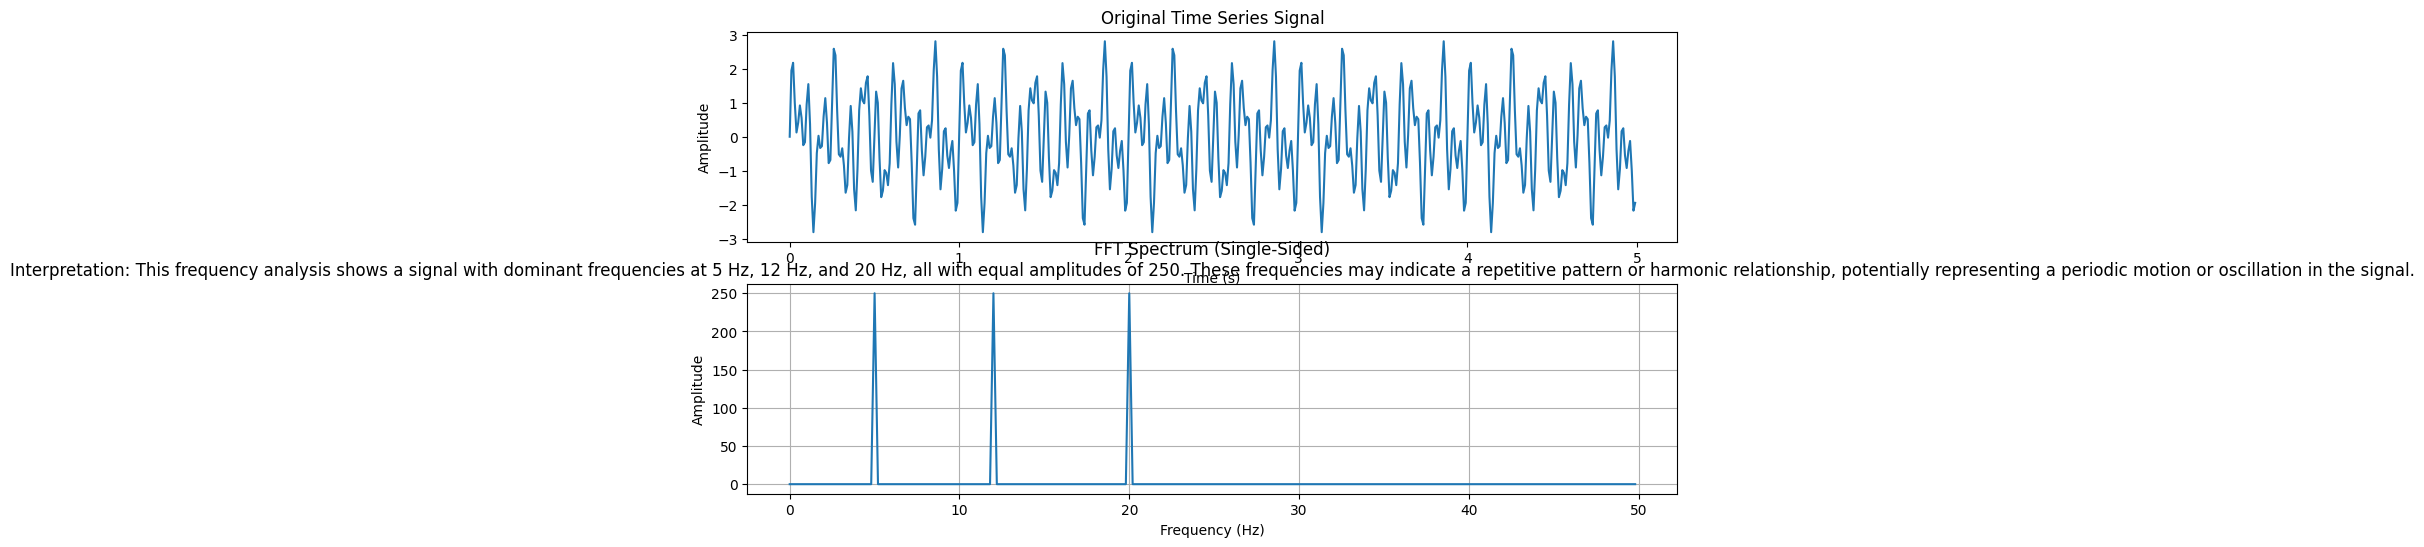

In [13]:
import numpy as np
from scipy.fft import fft, fftfreq
import os
import openai
import matplotlib.pyplot as plt

# Set your OpenAI API key as an environment variable
openai.api_key = os.getenv("OPENAI_API_KEY")

def generate_synthetic_data(sampling_rate, duration, frequencies=[5, 12, 20]):
    """Generates a synthetic time series signal."""
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = np.zeros_like(t)
    for freq in frequencies:
        signal += np.sin(2 * np.pi * freq * t)
    return t, signal

def analyze_fft(signal, sampling_rate, top_n_frequencies=3):
    """Performs FFT analysis and extracts key findings."""
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)
    yfa = np.abs(yf)
    dominant_indices = np.argsort(yfa[1:N//2])[::-1][:top_n_frequencies] + 1
    dominant_frequencies = xf[dominant_indices]
    dominant_amplitudes = yfa[dominant_indices]

    findings = {
        "dominant_frequencies": list(np.round(dominant_frequencies, 2)),
        "dominant_amplitudes": list(np.round(dominant_amplitudes, 2)),
    }
    return findings, xf, yfa, N, time, signal, dominant_frequencies

def get_llm_interpretation(fft_findings, data_description="synthetic signal"):
    """Gets an interpretation of the FFT findings from the LLM."""
    prompt = f"""
    Interpret the following frequency analysis of {data_description}:

    Dominant Frequencies (Hz): {fft_findings['dominant_frequencies']}
    Corresponding Amplitudes: {fft_findings['dominant_amplitudes']}

    What are the key characteristics of this frequency spectrum? Highlight any significant frequencies or patterns.
    Provide a concise interpretation (max 50 words).
    """
    try:
        client = openai.OpenAI()
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "user", "content": prompt}
            ]
        )
        interpretation = response.choices[0].message.content
        return interpretation
    except Exception as e:
        return f"Error getting LLM interpretation: {e}"

# Parameters
sampling_rate = 100  # Hz
duration = 5         # seconds

# Generate synthetic data
time, signal = generate_synthetic_data(sampling_rate, duration)

# Analyze using FFT
fft_results, xf, yfa, N, time_plot, signal_plot, dominant_frequencies = analyze_fft(signal, sampling_rate)
print("FFT Findings:", fft_results)

# Get LLM interpretation
llm_interpretation = get_llm_interpretation(fft_results, data_description="synthetic signal")
print("\nLLM Interpretation:", llm_interpretation)

print('\n')
print("\nFFT Findings:", fft_results)
print("Dominant Frequencies (Hz):", dominant_frequencies)
print('\n')

# Plotting with LLM insight in the title
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_plot, signal_plot)
plt.title('Original Time Series Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(xf[:N//2], yfa[:N//2])
plt.title(f'FFT Spectrum (Single-Sided)\nInterpretation: {llm_interpretation}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()